## Warmup Project: Data Exploration

This notebook contains data exploration for the warmup project for data science. In this project, I'm using the titanic dataset from Kaggle. The goal of this notebook is to just start to get a feel for the data, and start to understand what is actually in the dataset and how it might impact survival rates of the titanic sinking. 

### Importing Everything

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading in the data
First, loading in the data. Doing this using Pandas' read_csv() function

In [2]:
data = pd.read_csv("./Data/train.csv").dropna(subset = ['Survived', 'Age', 'Sex','Pclass'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


One thing to note is that in the data that loaded above, it seems like there are some tickets that are numbers, and some that are strings. I'll have to be careful of this if I want to visualize anything relating to ticket numbers. 

### Validating that the Data Loaded Correctly
I'm just going to do some basic checks that the data loaded correctly. 

For now, this will include just counting the null values.

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

Hmmm, it seems that there are some null values. These seem to be mostly age and cabin values although a few of them seem to be whether the passengers actually got on the ship

### Exploring the Data
Here, I'll be plotting/displaying various parameters included in the dataset, just to get a feel for the data. 

To make my code more readable, I'm going to split the dataframe into two different dataframes: one for those who survived, and one for those who didn't. This should make my code more readable when I want to plot how things are related to survival status than always having to say data[data.Survived == 1]. 

In [4]:
survived = data[data.Survived == 1]
died = data[data.Survived == 0]

One of the things that I think most people think of when they want to predict who survived the titanic is "Women and Children first". Let's see if more women and children did survie than adult men. 

To do this, I'm first going to create a histogram of the number of people that died/survived for both sexes.

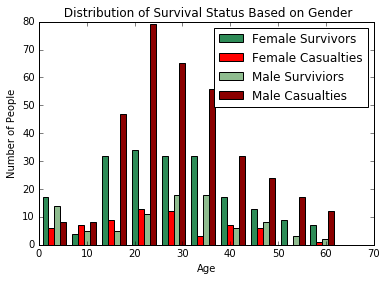

In [5]:
#Histogram code borrowed from: http://stackoverflow.com/questions/25539195/multiple-histograms-in-pandas
fig, ax = plt.subplots()


femSurvivedHeights, femSurvivedBins = np.histogram(survived[survived.Sex == "female"]["Age"], bins  = 10)
femDiedHeights, femDiedBins = np.histogram(died[died.Sex == "female"]["Age"], bins = femSurvivedBins)
malSurvivedHeights, malSurvivedBins = np.histogram(survived[survived.Sex == "male"]["Age"], bins = femSurvivedBins)
malDiedHeights, malDiedBins = np.histogram(died[died.Sex == "male"]["Age"], bins = femSurvivedBins)

width = (femSurvivedBins[1] - femSurvivedBins[0])/5

ax.bar(femSurvivedBins[:-1], femSurvivedHeights, width=width, facecolor='seagreen')
ax.bar(femDiedBins[:-1]+width, femDiedHeights, width=width, facecolor='r')
ax.bar(malSurvivedBins[:-1] + 2*width, malSurvivedHeights, width=width, facecolor='darkseagreen')
ax.bar(malDiedBins[:-1]+3*width, malDiedHeights, width=width, facecolor ='darkred')


ax.legend(['Female Survivors', 'Female Casualties', 'Male Surviviors', 'Male Casualties'])
ax.set_xlabel('Age')
ax.set_ylabel('Number of People')
ax.set_title(' Distribution of Survival Status Based on Gender')

So, in looking at this histogram, it does appear that the number of women who survived is consistently grater than the number of women who died. This, however, is not true for men. Up unil the age of about 10, more male children survived than died, but after this, many more men died than survived. So, it is women and children first, it appears. 

Now, this graph isn't the easiest to read, so I think I'm going to just plot survival rates for each set of ages. 

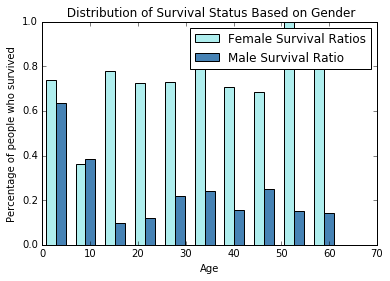

In [6]:
fig, ax = plt.subplots()

width = (femSurvivedBins[1] - femSurvivedBins[0])/3

femSurvivalRatios = np.divide(femSurvivedHeights, np.add(femSurvivedHeights, femDiedHeights), dtype = float)
malSurvivalRatios = np.divide(malSurvivedHeights, np.add(malSurvivedHeights, malDiedHeights), dtype = float)

ax.bar(femSurvivedBins[:-1], femSurvivalRatios, width=width, facecolor='paleturquoise')
ax.bar(malSurvivedBins[:-1]+width, malSurvivalRatios, width=width, facecolor='steelblue')

ax.legend(['Female Survival Ratios', 'Male Survival Ratio'])
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of people who survived')
ax.set_title(' Distribution of Survival Status Based on Gender')

So, this graph tells us that for younger ages, male and female people were equally likely to survive, but as age increases, women are much more likely to survive than men. So, yes, I'd say that women and children were more likely to survive than men. There is, however, something interesting happening with survival rates around the age of 10 where both men and women experience a drop in survival rate. I'm not exactly sure why something like this would happen, but I'd immagine it might be because around this age, people are no longer thought of as children, but weren't quite able to fend for themselves yet either. 


### How does Passenger Class affect likelihood of survival?
Next, I'm interested in taking a look at whether or not the class of ticket that a passenger bought influences their chances of survival. 

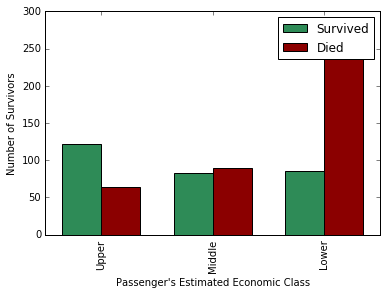

In [7]:
fig, ax = plt.subplots()

ax.bar(np.add(range(1,4),-0.35),survived.groupby('Pclass').count()['PassengerId'], width = 0.35, facecolor='seagreen')
ax.bar(range(1,4) ,died.groupby('Pclass').count()['PassengerId'], width = 0.35, facecolor='darkred')

ax.legend(['Survived', 'Died'])

labels = ['Upper', 'Middle', 'Lower']

plt.xticks(range(1,4), labels, rotation='vertical')

plt.xlabel('Passenger\'s Estimated Economic Class')
plt.ylabel('Number of Survivors')

# survived.groupby('Pclass').count()['PassengerId'].plot(kind='bar');
# died.groupby('Pclass').count()['PassengerId'].plot(kind='bar', );

Hmmm, so it does seem like people in first class were more likely to survive than they were to die. It seems like passengers in second class were about equally likely to survive as they were to die, and passengers in third class are much less likely to survive.

### Does the deck and cost of fare predict survival?

Now, I'm interested in seeing whether the cost of the fare or the deck (which is related to the cabin number, in that it appears to be the letter before the cabin number) that someone was in predicts their survival. I'm guessing that these are fairly related, as the cost of the fare would predict the cabin. 

First, I want to create a Cabin Recode column in both dataframes. To do this, I'll create a column that assigns numbers based on which cabin someone was staying in. Since the Cabins seem to be letter,number combinations, I'll be using the letters to distinguish between cabins.

My mapping should be 

NaN -> 0

A -> 1

B -> 2

C -> 3

D -> 4

E -> 5

F -> 6 

G -> 7


In [8]:
def recodeCabinToDeck(cabin):
    if isinstance(cabin, str):
        if (cabin[0] == 'A'):
            return 1
        elif (cabin[0] == 'B'):
            return 2
        elif (cabin[0] == 'C'):
            return 3
        elif (cabin[0] == 'D'):
            return 4
        elif (cabin[0] == 'E'):
            return 5
        elif (cabin[0] == 'F'):
            return 6
        elif (cabin[0] == 'G'):
            return 7
        else:
            return 8
    else:
        if (np.isnan):
            return 0
        else:
              return 8
    
          


Now that I've written a function to recode the cabin to a deck, I'm going to apply that function to my survived and died dataframes to just get the deck value for each passenger

In [9]:
survived['DeckRecode'] = survived.Cabin.apply(lambda x: recodeCabinToDeck(x))
died['DeckRecode'] = died.Cabin.apply(lambda x: recodeCabinToDeck(x))

/Users/Sophia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Sophia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


([<matplotlib.axis.XTick at 0x108f45c10>,
 <a list of 9 Text xticklabel objects>)

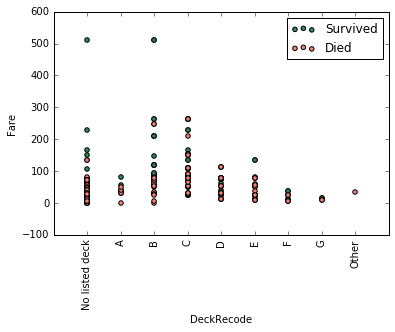

In [10]:
ax = survived.plot(kind='scatter', x='DeckRecode', y='Fare', color = 'seagreen');
died.plot(kind='scatter', x='DeckRecode', y='Fare', color = 'salmon', ax = ax)
ax.legend(['Survived', 'Died'])


labels = ['No listed deck', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Other']
plt.xticks(range(0,9), labels, rotation='vertical')

Wow, this is not really a great way to see this data, but, it does appear that people who paid lower fairs regardless of deck were less likely to survive. 